# Autism Spectrum Disorder 

### Initalizing Dask

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import dask
import dask.dataframe as dd
from dask.distributed import Client

%matplotlib inline
import doctest


In [2]:
#close existing dask connection 
try:
    if client is not None:
        #close it
        client.close()
        print("Old Client Closed")
except:
    print("Client Undefined")

Client Undefined


In [3]:
#get new connection
client = Client(n_workers=2, threads_per_worker=2, memory_limit='4GB')
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52405,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:52422,Total threads: 2
Dashboard: http://127.0.0.1:52424/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:52409,


### Data Scraping
##### Can skip once data is saved to a file

In [4]:
import tweepy
import csv
import json

twitter_client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAFT4awEAAAAAmJUdmEBmOhkd59vFiR7ItoGOcLo%3DelhZheHTSeqrFKCm4rjP6nQh9V9HwgsdSaQGwV68hZchICtefN')

# search query
query = 'autism -is:retweet lang:en'

# loading the tweets into a file
# Open/create a file to append data to
csvFile = open('result.csv', 'a')
csvFile.truncate(0)

#Use csv writer
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["TweetCreatedTime", "TweetContent", "Geo", "Lang", "Metrics"])

for tweet in tweepy.Paginator(twitter_client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at', 'geo', 'lang', 'public_metrics'], 
                              max_results=100).flatten(limit=10000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('ascii', 'ignore').decode('ascii'), json.dumps(tweet.geo), tweet.lang, json.dumps(tweet.public_metrics)])
csvFile.close()

### Data Clean Up

In [4]:
# ETL 
# Make sure to decode the tweets from utf-8 to read them in properly for ETL
data = dd.read_csv("result.csv", dtype={'Geo': 'object'})
display(data.head())

,TweetCreatedTime,TweetContent,Geo,Lang,Metrics
0,2022-05-15 12:56:15+00:00,@chorraich what has autism got to do with you telling me to shut up,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
1,2022-05-15 12:55:48+00:00,Top On Sale Product Recommendations!7 Color Creative Infinite Cube Infinity Cube Magic Stress Relief Cube Office Flip Cubic Puzzle Stop Stress Reliever Autism ToysOriginal price:USD 5.80Now:USD 4.06- - - - - - - - - - -- - -Click&amp;Buy:https://t.co/NaPAdGDR2s,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
2,2022-05-15 12:55:09+00:00,"@bjportraits @11thBlog It is. Autism eugenics, homosexual eugenics, ""socially undesirable""-for -whatever-reason eugenics.",NaN,en,"{""retweet_count"": 1, ""reply_count"": 0, ""like_count"": 1, ""quote_count"": 0}"
3,2022-05-15 12:55:05+00:00,Is one week cocaine for cats - my lateral Ikea hot tea\r\n#Schizophrenia #Psychosis #Bipolar #Cannabis #Marijuana #Autism https://t.co/L1R6T8cQ46,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
4,2022-05-15 12:55:01+00:00,"@Tip I listened to your podcast w/ #alexjones &amp; wanted to say thank you for speaking the truth about the factual documented link between #autism &amp; vaxxes predominately in black male children. Such important information! If you havent yet, watch the #vaxxed docu by @delbigtree",NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"


In [5]:
data.dtypes

TweetCreatedTime    object
TweetContent        object
Geo                 object
Lang                object
Metrics             object
dtype: object

In [6]:
data["TweetCreatedTime"] = dd.to_datetime(data.TweetCreatedTime)
display(data.head())
# data.visualize()

,TweetCreatedTime,TweetContent,Geo,Lang,Metrics
0,2022-05-15 12:56:15+00:00,@chorraich what has autism got to do with you telling me to shut up,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
1,2022-05-15 12:55:48+00:00,Top On Sale Product Recommendations!7 Color Creative Infinite Cube Infinity Cube Magic Stress Relief Cube Office Flip Cubic Puzzle Stop Stress Reliever Autism ToysOriginal price:USD 5.80Now:USD 4.06- - - - - - - - - - -- - -Click&amp;Buy:https://t.co/NaPAdGDR2s,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
2,2022-05-15 12:55:09+00:00,"@bjportraits @11thBlog It is. Autism eugenics, homosexual eugenics, ""socially undesirable""-for -whatever-reason eugenics.",NaN,en,"{""retweet_count"": 1, ""reply_count"": 0, ""like_count"": 1, ""quote_count"": 0}"
3,2022-05-15 12:55:05+00:00,Is one week cocaine for cats - my lateral Ikea hot tea\r\n#Schizophrenia #Psychosis #Bipolar #Cannabis #Marijuana #Autism https://t.co/L1R6T8cQ46,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"
4,2022-05-15 12:55:01+00:00,"@Tip I listened to your podcast w/ #alexjones &amp; wanted to say thank you for speaking the truth about the factual documented link between #autism &amp; vaxxes predominately in black male children. Such important information! If you havent yet, watch the #vaxxed docu by @delbigtree",NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}"


In [7]:
# Remove the byte encoded marker from the tweets
# data["TweetContent"] = data["TweetContent"].str.strip("b\'\"")
# data["TweetContent"] = data['TweetContent'].str.decode("utf-8")
# display(data.head())
# data.visualize()


print(len(data))

10000


In [8]:
# Creating functions to clean up the tweet and tokenize each tweet
import re
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanUp(text):
    '''
    Clean up each of the tweets to remove things like handles, hashtags, non alphanumeric characters.
    '''
    temp = text.lower() # Lower
    temp = re.sub("'", "", temp) # Contraction
    temp = temp.replace("\\n", " ") # Newline
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Handles
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # Hashtags
    temp = re.sub(r'http\S+', '', temp) # Links
    temp = re.sub('[()!?]', ' ', temp) # Punctuation
    temp = re.sub('\[.*?\]',' ', temp) # Punctuation
    temp = re.sub("[^a-z]"," ", temp) # Non alphanumeric
    
    # Tokenize the string and remove stop words
    stop_words = stopwords.words("english")
    stop_words.extend(["autism"])
    
    temp = word_tokenize(temp)
    temp = list(filter(lambda x: x not in stop_words, temp))
    temp = " ".join(temp)
    
    return temp

def cleanRow(df):
    '''
    Takes in a dataframe and clean the tweetcontent row
    '''
    df["CleanedTweet"] = df["TweetContent"].map(cleanUp)
    return df


In [9]:
# Clean Tweets
# filter only tweets in english
data = data[data["Lang"] == 'en']

data = data.map_partitions(cleanRow)
display(data.head(5))
# data.visualize()

,TweetCreatedTime,TweetContent,Geo,Lang,Metrics,CleanedTweet
0,2022-05-15 12:56:15+00:00,@chorraich what has autism got to do with you telling me to shut up,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}",got telling shut
1,2022-05-15 12:55:48+00:00,Top On Sale Product Recommendations!7 Color Creative Infinite Cube Infinity Cube Magic Stress Relief Cube Office Flip Cubic Puzzle Stop Stress Reliever Autism ToysOriginal price:USD 5.80Now:USD 4.06- - - - - - - - - - -- - -Click&amp;Buy:https://t.co/NaPAdGDR2s,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}",top sale product recommendations color creative infinite cube infinity cube magic stress relief cube office flip cubic puzzle stop stress reliever toysoriginal price usd usd click amp buy
2,2022-05-15 12:55:09+00:00,"@bjportraits @11thBlog It is. Autism eugenics, homosexual eugenics, ""socially undesirable""-for -whatever-reason eugenics.",NaN,en,"{""retweet_count"": 1, ""reply_count"": 0, ""like_count"": 1, ""quote_count"": 0}",eugenics homosexual eugenics socially undesirable whatever reason eugenics
3,2022-05-15 12:55:05+00:00,Is one week cocaine for cats - my lateral Ikea hot tea\r\n#Schizophrenia #Psychosis #Bipolar #Cannabis #Marijuana #Autism https://t.co/L1R6T8cQ46,NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}",one week cocaine cats lateral ikea hot tea
4,2022-05-15 12:55:01+00:00,"@Tip I listened to your podcast w/ #alexjones &amp; wanted to say thank you for speaking the truth about the factual documented link between #autism &amp; vaxxes predominately in black male children. Such important information! If you havent yet, watch the #vaxxed docu by @delbigtree",NaN,en,"{""retweet_count"": 0, ""reply_count"": 0, ""like_count"": 0, ""quote_count"": 0}",listened podcast w amp wanted say thank speaking truth factual documented link amp vaxxes predominately black male children important information havent yet watch docu


### Vectorization

In [10]:
# Converting the data to array
dataArr = data['CleanedTweet'].to_dask_array()
dataArr.compute_chunk_sizes()
dataArr

dask.array<values, shape=(10000,), dtype=object, chunksize=(10000,), chunktype=numpy.ndarray>

In [11]:
# from dask_ml.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
    
# Dask Way
# vectorizer = HashingVectorizer()
# X = vectorizer.fit_transform(data['CleanedTweet'])
# X.compute_chunk_sizes()
# X

# Sklearn Way
vectorizer = TfidfVectorizer(use_idf=True)
pdata = dataArr.compute()
print(pdata.shape)
X = vectorizer.fit(pdata).transform(pdata)
X.shape

    

(10000,)


(10000, 15909)

In [12]:
# Checking out the TFIDF
tfidf = pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])
tfidf = tfidf.sort_values('TF-IDF', ascending=False)
print (tfidf.head(10))

              TF-IDF
shut        0.654892
telling     0.619448
got         0.432898
aaa         0.000000
piss        0.000000
pissy       0.000000
pissing     0.000000
pisses      0.000000
pissed      0.000000
piscataway  0.000000


C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Checkout hashing vectorizer
vectorizerH = HashingVectorizer()
Xh = vectorizerH.fit_transform(pdata)
Xh

<10000x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 119806 stored elements in Compressed Sparse Row format>

In [14]:
# Checking out the TFIDF
print(Xh.shape)
print (Xh[0])

(10000, 1048576)
  (0, 306451)	-0.5773502691896258
  (0, 787517)	0.5773502691896258
  (0, 1001813)	-0.5773502691896258


### Kmeans

In [22]:
from dask_ml.cluster import KMeans
import numpy as np


km = KMeans()

# Dask Way
# X.astype(np.float64, casting='safe').compute()
# km.fit_transform(X)

# Sklearn way
Xarr = np.asarray(X.todense())
km.fit_transform(Xarr)


C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


dask.array<sqrt, shape=(10000, 8), dtype=float64, chunksize=(833, 8), chunktype=numpy.ndarray>

In [26]:
from sklearn.metrics import silhouette_score as ss
from dask_ml.cluster import KMeans


inertias = []
di = pd.DataFrame(columns=["k","inertia","model","sil"])
di = di.set_index('k')

for r in range(2, 20):
 
    km = KMeans(n_clusters=r,random_state=1)
    km.fit(Xarr,)

    #get score
    score = ss(Xarr,km.labels_)

    ap = {"k":[r],"inertia":[km.inertia_],"model":[km],"sil":score}
    d2 = pd.DataFrame(ap)
    d2 = d2.set_index('k')
    
    #append
    di = pd.concat([di,d2])#,ignore_index=True)
    inertias.append(km.inertia_)
    


C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(
C:\Users\regmi\Desktop\UMD\Data605\data605venv\lib\site-packages\dask\base.py:1282: UserWarning: Running on a si

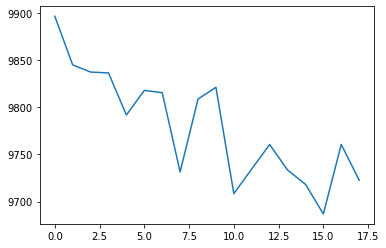

In [27]:
import matplotlib.pyplot as plt

plt.plot(inertias)

### Sentiment Analysis

In [ ]:
from textblob import TextBlob

